In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ranksums
from scipy.stats import ks_2samp

In [2]:
file_xlsx = pd.ExcelFile('Database.xlsx')
df_ams_atr = pd.read_excel(file_xlsx, sheet_name='Amostra com Atributos')
df_neg = pd.read_excel(file_xlsx, sheet_name='Negativacao')
df_cont_cart_cred = pd.read_excel(file_xlsx, sheet_name='Contratos de Cartão de Crédtido')

In [3]:
df_ams_atr.head()

,Consumidor_Id,Data Análise,Carteira,Sexo,Data de Nascimento,Contratos Ativos,Contratos em atraso com mais de 30 dias,Inadimplente \n(90 dias de atraso em 180 dias)
0,1,2016-10-05 00:00:00,A,feminino,'9/1987,1,0,Não
1,2,2016-10-02 00:00:00,A,M,'2001,0,#,Não
2,3,2016-10-04 00:00:00,b,F,1946-09-17 00:00:00,1,0,Não
3,4,2016-10-06 00:00:00,C,F,1989-09-29 12:00:00,1,0,Sim
4,5,2016-10-06 00:00:00,C,F,'1989,1,0,Não


In [4]:
df_neg.head()

,Consumidor_Id,Tipo_Ocorrencia,Data_Ocorrencia,Data_Exclusão
0,22,Debito_Banco,2015-08-15,2016-10-28
1,22,Debito_Banco,2016-08-15,2017-08-15
2,22,Debito_Banco,2016-08-16,2017-11-20
3,22,Debito_Banco,2016-08-17,2017-10-22
4,22,Debito_Banco,2016-08-18,2017-08-18


In [5]:
df_cont_cart_cred.head()

,Consumidor_Id,Cartão,Data de Contratação
0,1,aa,2016-02-21
1,34,aaa,2016-04-18
2,62,ccc,2014-11-26
3,3,bb,2016-04-14
4,49,bb,2016-04-14


In [6]:
df_ams_atr['Carteira'] = df_ams_atr['Carteira'].str.upper()
df_ams_atr['Sexo'] = df_ams_atr['Sexo'].replace(['feminino','Feminino'],'F')
df_ams_atr['Sexo'] = df_ams_atr['Sexo'].replace(['Macsulino','masculino', 'Masculino'],'M')
df_ams_atr['Data Análise'] = df_ams_atr['Data Análise'].replace('Out/03/2016', '03/10/2016')
df_ams_atr['Data Análise'] = df_ams_atr['Data Análise'].replace('Out/2018', '10/2018')
df_ams_atr['Data Análise'] = df_ams_atr['Data Análise'].replace('Out/2016', '10/2016')
df_ams_atr['Data de Nascimento'] = pd.to_datetime(df_ams_atr['Data de Nascimento'])
df_ams_atr['Data Análise'] = pd.to_datetime(df_ams_atr['Data Análise'])
df_ams_atr = df_ams_atr.rename(columns={'Inadimplente \n(90 dias de atraso em 180 dias)': 'Inadimplente', \
                                        'Contratos em atraso com mais de 30 dias':'Contratos_Atrasados', \
                                        'Contratos Ativos':'Contratos_Ativos'})
df_cont_cart_cred = df_cont_cart_cred.rename(columns={'Data  de Contratação': 'Data_Contratacao'})

In [7]:
df_ams_atr = df_ams_atr[df_ams_atr['Inadimplente'].notna()]

In [8]:
df_ams_atr.head()

,Consumidor_Id,Data Análise,Carteira,Sexo,Data de Nascimento,Contratos_Ativos,Contratos_Atrasados,Inadimplente
0,1,2016-10-05,A,F,1987-09-01 00:00:00,1,0,Não
1,2,2016-10-02,A,M,2001-01-01 00:00:00,0,#,Não
2,3,2016-10-04,B,F,1946-09-17 00:00:00,1,0,Não
3,4,2016-10-06,C,F,1989-09-29 12:00:00,1,0,Sim
4,5,2016-10-06,C,F,1989-01-01 00:00:00,1,0,Não


In [9]:
df_neg.head()

,Consumidor_Id,Tipo_Ocorrencia,Data_Ocorrencia,Data_Exclusão
0,22,Debito_Banco,2015-08-15,2016-10-28
1,22,Debito_Banco,2016-08-15,2017-08-15
2,22,Debito_Banco,2016-08-16,2017-11-20
3,22,Debito_Banco,2016-08-17,2017-10-22
4,22,Debito_Banco,2016-08-18,2017-08-18


In [10]:
df_cont_cart_cred.head()

,Consumidor_Id,Cartão,Data_Contratacao
0,1,aa,2016-02-21
1,34,aaa,2016-04-18
2,62,ccc,2014-11-26
3,3,bb,2016-04-14
4,49,bb,2016-04-14


In [11]:
df_ams_atr['Consumidor_Idade'] = pd.to_timedelta((df_ams_atr['Data Análise'] - df_ams_atr['Data de Nascimento'])).dt.days / 365

In [12]:
df_ams_atr = df_ams_atr[df_ams_atr['Consumidor_Idade'] < 100]

In [13]:
df_amr_atr_neg = df_ams_atr.merge(df_neg, how='left', on='Consumidor_Id')

In [14]:
df_amr_atr_neg = df_amr_atr_neg[df_amr_atr_neg['Data_Ocorrencia'] < df_amr_atr_neg['Data Análise']]
df_amr_atr_neg = df_amr_atr_neg[df_amr_atr_neg['Data_Exclusão'] > df_amr_atr_neg['Data Análise']]

In [15]:
neg_consumidor = df_amr_atr_neg['Consumidor_Id'].value_counts()

In [16]:
df_ams_atr['Negativacoes'] = ''

In [17]:
for index, row in df_ams_atr.iterrows():
    df_ams_atr['Negativacoes'][index] = neg_consumidor.get(row['Consumidor_Id'])

<ipython-input-17-7e76181ef252>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ams_atr['Negativacoes'][index] = neg_consumidor.get(row['Consumidor_Id'])


In [18]:
df_ams_atr['Negativacoes'] = df_ams_atr['Negativacoes'].fillna(0)

In [19]:
df_ams_atr = df_ams_atr.merge(df_cont_cart_cred, how='left', on='Consumidor_Id')

In [20]:
df_ams_atr['Cartão'] = df_ams_atr['Cartão'].map('Sim'.format, na_action='ignore')
df_ams_atr['Cartão'] = df_ams_atr['Cartão'].fillna('Nao')

In [21]:
len(df_ams_atr[df_ams_atr['Cartão'] == 'Sim'][df_ams_atr['Data_Contratacao'] > df_ams_atr['Data Análise']])

<ipython-input-21-9f08a4121668>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_ams_atr[df_ams_atr['Cartão'] == 'Sim'][df_ams_atr['Data_Contratacao'] > df_ams_atr['Data Análise']])


0

In [22]:
df_ams_atr.head()

,Consumidor_Id,Data Análise,Carteira,Sexo,Data de Nascimento,Contratos_Ativos,Contratos_Atrasados,Inadimplente,Consumidor_Idade,Negativacoes,Cartão,Data_Contratacao
0,1,2016-10-05,A,F,1987-09-01 00:00:00,1,0,Não,29.115068,0,Sim,2016-02-21
1,2,2016-10-02,A,M,2001-01-01 00:00:00,0,#,Não,15.761644,1,Nao,NaT
2,3,2016-10-04,B,F,1946-09-17 00:00:00,1,0,Não,70.095890,0,Sim,2016-04-14
3,4,2016-10-06,C,F,1989-09-29 12:00:00,1,0,Sim,27.035616,0,Sim,2014-11-26
4,5,2016-10-06,C,F,1989-01-01 00:00:00,1,0,Não,27.780822,0,Sim,2015-07-28


#### Analises mais simples

In [23]:
df_ams_atr['Inadimplente'].value_counts()

Não    29
Sim    28
Name: Inadimplente, dtype: int64

In [24]:
df_ams_atr[df_ams_atr['Sexo'] == 'F']['Inadimplente'].value_counts()

Não    15
Sim    12
Name: Inadimplente, dtype: int64

In [25]:
df_ams_atr[df_ams_atr['Sexo'] == 'M']['Inadimplente'].value_counts()

Sim    16
Não    14
Name: Inadimplente, dtype: int64

In [26]:
df_ams_atr[df_ams_atr['Carteira'] =='A']['Inadimplente'].value_counts()

Não    10
Sim     6
Name: Inadimplente, dtype: int64

In [27]:
df_ams_atr[df_ams_atr['Carteira'] =='B']['Inadimplente'].value_counts()

Não    8
Sim    7
Name: Inadimplente, dtype: int64

In [28]:
df_ams_atr[df_ams_atr['Carteira'] =='C']['Inadimplente'].value_counts()

Sim    10
Não     7
Name: Inadimplente, dtype: int64

In [29]:
df_ams_atr[df_ams_atr['Cartão'] =='Nao']['Inadimplente'].value_counts()

Não    7
Sim    6
Name: Inadimplente, dtype: int64

In [30]:
df_ams_atr[df_ams_atr['Cartão'] =='Sim']['Inadimplente'].value_counts()

Não    22
Sim    22
Name: Inadimplente, dtype: int64

#### Testes de normalidade

In [31]:
def testar_normalidade(dados, label): 
    sns.distplot(dados, hist=False, label=label)

    alpha = 0.01
    tes,p2 = shapiro(dados)
    if p2 > alpha:
        print('Hipótese Nula - distribuição normal')
    else:
        print('Hipótese Nula rejeitada - dados não possuem distribuição normal')

Hipótese Nula rejeitada - dados não possuem distribuição normal


D:\Programas\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


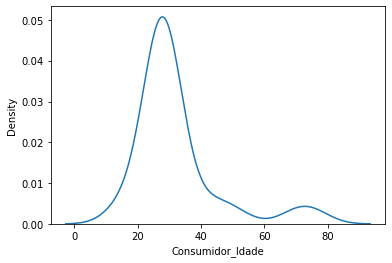

In [32]:
testar_normalidade(df_ams_atr['Consumidor_Idade'], 'Idade do consumidor')

D:\Programas\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Hipótese Nula rejeitada - dados não possuem distribuição normal


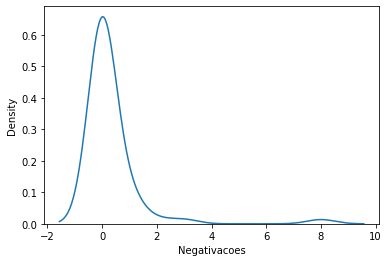

In [33]:
testar_normalidade(df_ams_atr['Negativacoes'], 'Negativações')

D:\Programas\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Hipótese Nula rejeitada - dados não possuem distribuição normal


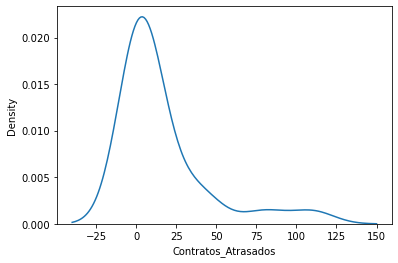

In [34]:
df_contratos_atrasados = df_ams_atr[df_ams_atr['Contratos_Atrasados'] != '#']
testar_normalidade(df_contratos_atrasados['Contratos_Atrasados'], 'Contratos Atrasados')

D:\Programas\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Hipótese Nula rejeitada - dados não possuem distribuição normal


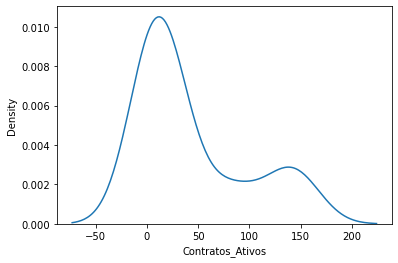

In [35]:
testar_normalidade(df_contratos_atrasados['Contratos_Ativos'], 'Contratos Ativos')

#### Testes de hipotese para dados nao normais

In [36]:
def aplicar_testes(df_amostra, parametro):
    str_amostra_1 = f"{df_amostra}[{df_amostra}['Inadimplente'] == 'Não'].{parametro}"
    amostra_1 = eval(str_amostra_1)
    str_amostra_2 = f"{df_amostra}[{df_amostra}['Inadimplente'] == 'Sim'].{parametro}"
    amostra_2 = eval(str_amostra_2)

    u_statistic1, p_value1 = mannwhitneyu(amostra_1,amostra_2, alternative = 'two-sided')
    u_statistic2, p_value2 = ranksums(amostra_1,amostra_2)
    u_statistic3, p_value3 = ks_2samp(amostra_1 ,amostra_2 ,alternative='two-sided')

    if (p_value1 < 0.05) or (p_value2 < 0.05) or (p_value3 < 0.05):
        print("Hipótese Nula rejeitada. De acordo com:")
    if (p_value1 < 0.05):
        print("- Mann-Whitney-U. Valor-p:", p_value1)
    if (p_value2 < 0.05):
        print("- RankSums. Valor-p:", p_value2)
    if (p_value3 < 0.05):
        print("- Kolmogorov-Smirnov. Valor-p:", p_value3)
    else:
        print("Sem estatísticas revelantes para se anular a Hipótese Nula")

In [37]:
aplicar_testes('df_ams_atr', 'Consumidor_Idade')

Sem estatísticas revelantes para se anular a Hipótese Nula


In [38]:
aplicar_testes('df_ams_atr', 'Negativacoes')

Sem estatísticas revelantes para se anular a Hipótese Nula


In [39]:
aplicar_testes('df_contratos_atrasados', 'Contratos_Atrasados')

Hipótese Nula rejeitada. De acordo com:
- Mann-Whitney-U. Valor-p: 1.917982492514108e-05
- RankSums. Valor-p: 2.939188989116168e-05
- Kolmogorov-Smirnov. Valor-p: 0.00016846415501926455


In [40]:
aplicar_testes('df_ams_atr', 'Contratos_Ativos')

Hipótese Nula rejeitada. De acordo com:
- Mann-Whitney-U. Valor-p: 0.0030431375201239127
- RankSums. Valor-p: 0.0033131386287984094
- Kolmogorov-Smirnov. Valor-p: 9.200576520695947e-05


In [41]:
df_contratos_atrasados[df_contratos_atrasados['Inadimplente'] == 'Sim']['Contratos_Atrasados'].mean()

30.40909090909091

In [42]:
df_contratos_atrasados[df_contratos_atrasados['Inadimplente'] == 'Não']['Contratos_Atrasados'].mean()

2.1363636363636362

In [43]:
df_contratos_atrasados[df_contratos_atrasados['Inadimplente'] == 'Sim']['Contratos_Ativos'].mean()

71.9090909090909

In [44]:
df_contratos_atrasados[df_contratos_atrasados['Inadimplente'] == 'Não']['Contratos_Ativos'].mean()

14.227272727272727